In [53]:
import pandas as pd
import numpy as np

In [54]:
books = pd.read_csv("Books.csv")
ratings = pd.read_csv("Ratings.csv")
users = pd.read_csv("Users.csv")

C:\Users\ferna\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [55]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,https://images.amazon.com/images/P/0195153448....,https://images.amazon.com/images/P/0195153448....,https://images.amazon.com/images/P/0195153448....
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,https://images.amazon.com/images/P/0002005018....,https://images.amazon.com/images/P/0002005018....,https://images.amazon.com/images/P/0002005018....
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,https://images.amazon.com/images/P/0060973129....,https://images.amazon.com/images/P/0060973129....,https://images.amazon.com/images/P/0060973129....
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,https://images.amazon.com/images/P/0374157065....,https://images.amazon.com/images/P/0374157065....,https://images.amazon.com/images/P/0374157065....
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,https://images.amazon.com/images/P/0393045218....,https://images.amazon.com/images/P/0393045218....,https://images.amazon.com/images/P/0393045218....


In [56]:
ratings.head() # from 0 to 10

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [57]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [58]:
books.shape

(271360, 8)

In [59]:
ratings.shape

(1149780, 3)

In [60]:
users.shape

(278858, 3)

In [61]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [62]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [63]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [64]:
books.duplicated().sum()

0

In [65]:
ratings.duplicated().sum()

0

In [66]:
users.duplicated().sum()

0

In [67]:
books.describe()
ratings.describe()
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [68]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [69]:
ratings.dtypes

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

In [70]:
users.dtypes # Ages is float. but why? cause everything will be .0 right? eg: 19.0,23.0 etc.

User-ID       int64
Location     object
Age         float64
dtype: object

'\nHere as we can see most of the ratings are 0 hence most of the user have kept their ratings implicit.\n'

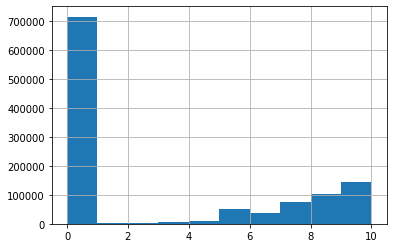

In [71]:
import matplotlib.pyplot as plt
ratings["Book-Rating"].hist()
plt.show
'''
Here as we can see most of the ratings are 0 hence most of the user have kept their ratings implicit.
'''

## Popularity Based Recommender System

In [72]:
ratings_with_name = ratings.merge(books, on="ISBN")
ratings_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....
...,...,...,...,...,...,...,...,...,...,...
196824,276680,086505505X,0,Home Crafts (Historic Communities (Paperback)),Bobbie Kalman,1990,Crabtree Publishing Company,https://images.amazon.com/images/P/086505505X....,https://images.amazon.com/images/P/086505505X....,https://images.amazon.com/images/P/086505505X....
196825,276680,1564407284,0,"The Old Sturbridge Village Cookbook, 2nd : Aut...",Caroline Sloat,1995,Globe Pequot,https://images.amazon.com/images/P/1564407284....,https://images.amazon.com/images/P/1564407284....,https://images.amazon.com/images/P/1564407284....
196826,276680,1582343594,0,City of Masks : A Cree Black Novel,Daniel Hecht,2004,Bloomsbury USA,https://images.amazon.com/images/P/1582343594....,https://images.amazon.com/images/P/1582343594....,https://images.amazon.com/images/P/1582343594....
196827,276681,1931333246,10,Chorus,Kurt Messick,2003,Dry Bones Press,https://images.amazon.com/images/P/1931333246....,https://images.amazon.com/images/P/1931333246....,https://images.amazon.com/images/P/1931333246....


In [73]:
num_ratings = ratings_with_name.groupby("Book-Title").count()["Book-Rating"].reset_index()
num_ratings.rename(columns={'Book-Rating': 'num_ratings'}, inplace=True)
num_ratings

,Book-Title,num_ratings
0,Earth Prayers From around the World: 365 Pray...,10
1,Final Fantasy Anthology: Official Strategy Gu...,4
2,Flight of Fancy: American Heiresses (Zebra Ba...,2
3,Little Comic Shop of Horrors (Give Yourself G...,4
4,Mystery Mile,2
...,...,...
68750,Ã?Â?lpiraten.,2
68751,Ã?Â?rger mit Produkt X. Roman.,4
68752,Ã?Â?sterlich leben.,1
68753,Ã?Â?stlich der Berge.,3


In [74]:
avg_ratings = ratings_with_name.groupby("Book-Title").mean().round(3)["Book-Rating"].reset_index()
avg_ratings.rename(columns={'Book-Rating': 'avg_ratings'}, inplace=True)
avg_ratings

,Book-Title,avg_ratings
0,Earth Prayers From around the World: 365 Pray...,5.000
1,Final Fantasy Anthology: Official Strategy Gu...,5.000
2,Flight of Fancy: American Heiresses (Zebra Ba...,4.000
3,Little Comic Shop of Horrors (Give Yourself G...,1.250
4,Mystery Mile,0.000
...,...,...
68750,Ã?Â?lpiraten.,0.000
68751,Ã?Â?rger mit Produkt X. Roman.,5.250
68752,Ã?Â?sterlich leben.,7.000
68753,Ã?Â?stlich der Berge.,2.667


In [75]:
popular_df = num_ratings.merge(avg_ratings, on="Book-Title")
popular_df

,Book-Title,num_ratings,avg_ratings
0,Earth Prayers From around the World: 365 Pray...,10,5.000
1,Final Fantasy Anthology: Official Strategy Gu...,4,5.000
2,Flight of Fancy: American Heiresses (Zebra Ba...,2,4.000
3,Little Comic Shop of Horrors (Give Yourself G...,4,1.250
4,Mystery Mile,2,0.000
...,...,...,...
68750,Ã?Â?lpiraten.,2,0.000
68751,Ã?Â?rger mit Produkt X. Roman.,4,5.250
68752,Ã?Â?sterlich leben.,1,7.000
68753,Ã?Â?stlich der Berge.,3,2.667


In [76]:
popular_df = popular_df[popular_df["num_ratings"]> 250].sort_values("avg_ratings", ascending = False).head(50)


In [77]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_ratings']]


In [78]:
popular_df

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_ratings
0,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,https://images.amazon.com/images/P/043935806X....,335,5.585
4,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,https://images.amazon.com/images/P/059035342X....,575,4.896
6,"A Child Called \It\"": One Child's Courage to S...",Dave Pelzer,https://images.amazon.com/images/P/1558743669....,265,4.087
8,Bridget Jones's Diary,Helen Fielding,https://images.amazon.com/images/P/0330332775....,270,3.752
14,The No. 1 Ladies' Detective Agency (Today Show...,Alexander McCall Smith,https://images.amazon.com/images/P/1400034779....,431,3.418
15,How to Be Good,Nick Hornby,https://images.amazon.com/images/P/1573229326....,304,3.306
18,Snow Falling on Cedars,David Guterson,https://images.amazon.com/images/P/0151001006....,627,3.236
25,A Painted House,John Grisham,https://images.amazon.com/images/P/044023722X....,833,3.222
30,The Bridges of Madison County,Robert James Waller,https://images.amazon.com/images/P/044651652X....,371,3.097
35,The Firm,John Grisham,https://images.amazon.com/images/P/0385416342....,535,3.064


In [79]:
popular_df['Image-URL-M'][0]

'https://images.amazon.com/images/P/043935806X.01.MZZZZZZZ.jpg'

## Collaborative Filtering Based Recommendation System

In [80]:
x = ratings_with_name.groupby("User-ID").count()["Book-Rating"] > 200
user_with_ample_knowledge = x[x].index

In [81]:
filtered_ratings = ratings_with_name[ratings_with_name["User-ID"].isin(user_with_ample_knowledge)]


In [82]:
y = ratings_with_name.groupby("Book-Title").count()["Book-Rating"] > 50
famous_books = y[y].index

In [83]:
final_ratings = filtered_ratings[filtered_ratings["Book-Title"].isin(famous_books)]


In [84]:
pt = final_ratings.pivot_table(index = "Book-Title", columns = "User-ID", values = "Book-Rating")
pt.fillna(0,inplace=True)

In [85]:
pt

User-ID,11601,11676,16795,23768,23902,26544,35859,36606,36836,52584,...,234623,235105,238781,241198,242824,245963,261105,266226,275970,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"A Child Called \It\"": One Child's Courage to Survive""",0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Fine Balance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
What to Expect When You're Expecting (Revised Edition),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Where is Joe Merchant?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Whispers,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
from sklearn.metrics.pairwise import cosine_similarity

In [87]:
similarity_scores = cosine_similarity(pt)

In [88]:
similarity_scores.shape

(256, 256)

In [89]:
def recommend(book_name):
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:9]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

In [90]:
recommend('16 Lighthouse Road')

[['Key of Light (Key Trilogy (Paperback))',
  'Nora Roberts',
  'https://images.amazon.com/images/P/051513628X.01.MZZZZZZZ.jpg'],
 ['Pendragon',
  'Catherine Coulter',
  'https://images.amazon.com/images/P/051513225X.01.MZZZZZZZ.jpg'],
 ['Forever... : A Novel of Good and Evil, Love and Hope',
  'Jude Deveraux',
  'https://images.amazon.com/images/P/067101420X.01.MZZZZZZZ.jpg'],
 ['Three Fates',
  'Nora Roberts',
  'https://images.amazon.com/images/P/0515135062.01.MZZZZZZZ.jpg'],
 ['Rising Tides',
  'Nora Roberts',
  'https://images.amazon.com/images/P/051512317X.01.MZZZZZZZ.jpg'],
 ['Face the Fire (Three Sisters Island Trilogy)',
  'Nora Roberts',
  'https://images.amazon.com/images/P/051513287X.01.MZZZZZZZ.jpg'],
 ['Purity in Death',
  'J.D. Robb',
  'https://images.amazon.com/images/P/042518630X.01.MZZZZZZZ.jpg'],
 ['Beach House',
  'Mary Alice Monroe',
  'https://images.amazon.com/images/P/1551668998.01.MZZZZZZZ.jpg']]

In [91]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))

In [92]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))